<a href="https://colab.research.google.com/github/yuktank/Exploratory-Data-Analysis-of-Car-Features/blob/master/car-data-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory Data Analysis of Car Features**

The dataset is taken from Kaggle. 
Link: https://www.kaggle.com/CooperUnion/cardataset

In [1]:
# Importing the required libraries
import numpy as np                     # for linear algebra
import pandas as pd                    # for data handling
import seaborn as sns                  # for drawing highly attractive and informative graphics
import matplotlib.pyplot as plt        # for plotting graphs
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Upload file into google colab 
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
# Load dataset for reading using pandas library
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [4]:
# Display first 5 rows
df.head()   

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
# Display last 5 rows
df.tail()     

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [6]:
df.shape

(11914, 16)

In [7]:
# Print a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [8]:
#  Compute a summary of statistics pertaining to the DataFrame columns. 
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [9]:
# Drop Engine Fuel Type and Number of Doors as it is irrelevent in our case. We 
# will also drop Market Category as it contains a lot of null values as we can see in output[8]
df = df.drop(['Engine Fuel Type', 'Number of Doors', 'Market Category'], axis = 1)

In [10]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [11]:
# Rename the columns to improve the readability of the dataset
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


## **Dropping the duplicate rows**

Sometimes in huge dataset, there maybe duplicate data. We remove all duplicate data here.

In [12]:
duplicate_rows = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (792, 13)


In [13]:
df = df.drop_duplicates()
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


## **Dropping the missing or null values**

This is not the best approach and generally people just replace the missing values with the mean or the average of that column. This helps in fine tuning the model performance as more the data, a model has the better it performs.

In [14]:
# Print null values
print(df.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


Columns HP and Cylinders have less counts. 
Sometimes csv file has null values, which are later displayed as NaN in Data Frame. Pandas dropna() method allows the user to analyze and drop Rows/Columns with Null values.

In [15]:
# Dropping the missing values.
df = df.dropna()              
df.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [17]:
# After dropping null values
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


## **Detecting Outliers**

An outlier is a point or set of points that are different from other points.Sometimes they can be very high or very low. It is good to detect and remove the outliers, because outliers are one of the primary reason for resulting in a less accurate model.Often outliers can be seen with visualizations using a box plot. Herein all the plots, you can find some points are outside the box they are none other than outliers. 

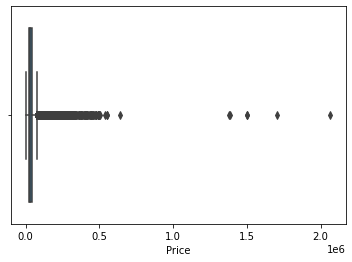

In [18]:
sns.boxplot(x=df['Price'])

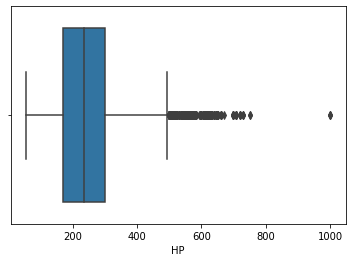

In [19]:
sns.boxplot(x=df['HP'])

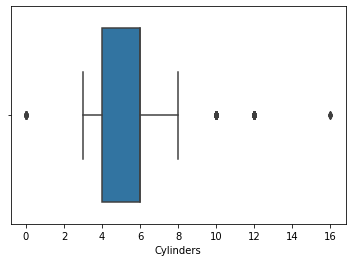

In [20]:
sns.boxplot(x=df['Cylinders'])

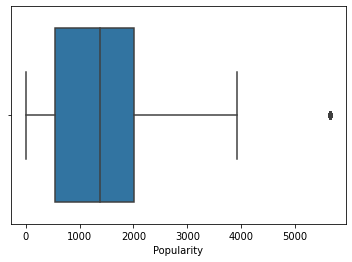

In [21]:
sns.boxplot(x=df['Popularity'])

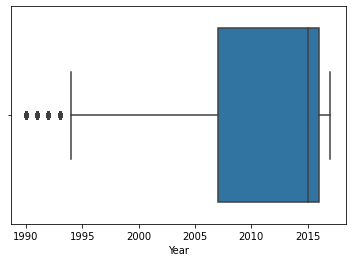

In [22]:
sns.boxplot(x=df['Year'])

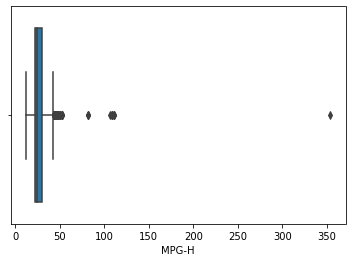

In [23]:
sns.boxplot(x=df['MPG-H'])

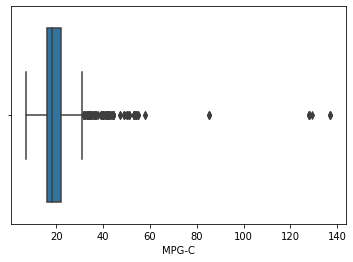

In [24]:
sns.boxplot(x=df['MPG-C'])

In [25]:
# Interquartile range(IQR) score technique
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [26]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(8546, 13)

## **Find the car brands are the most represented in the dataset and average price among the top car brands.**

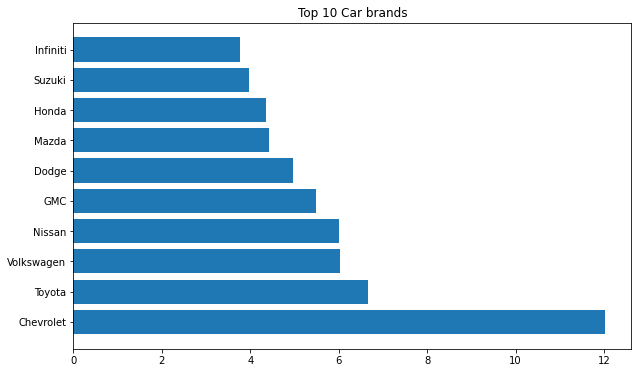

In [27]:
# Percentage of car per brand
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())
# top 10 
top_labels = counts.index[:10]   
# Plot
plt.figure(figsize=(10,6))
plt.barh(top_labels, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

In [28]:
# Average price among the top car brands
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


## **Correlation Matrix**

One can find correlations using pandas '.corr()' function and can visualize the correlation matrix using a heatmap in seaborn. Dark shades represents positive correlation while lighter shades represents negative correlation. If you set annot = True, you'll get values by which features are correlated to each other in grid-cells.

In [29]:
# Plot the correlation matrix
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


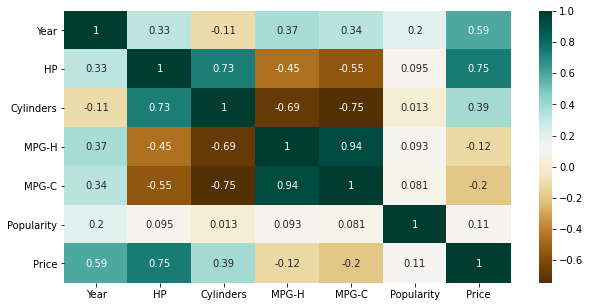

In [30]:
# Plotting heatmap
plt.figure(figsize=(10,5))
matrix = df.corr()
sns.heatmap(matrix, cmap="BrBG", annot=True )

We can infer that
*   'Price' has strong positive correlation with 'HP'
*   Both 'MPG-H' and 'MPG-C' have strong negative correlation with 'Cylinders'
*   'Popularity' is not correlated with anything. 
*   'HP' has strong positive correlation with 'Cylinders'
*   'MPG-C' has strong positive correlation with 'MPG-H'

Therefore, we can conclude that
*   The more cylinders there are, the more powerful the car is.
*   Highway mpg / Engine Cylinders have a strong negative correlation with highway and city MPG because lower MPG figures mean higher fuel consumption.








## **Perform EDA and plot different graphs**
 Scatter plot graphs of different variables versus price

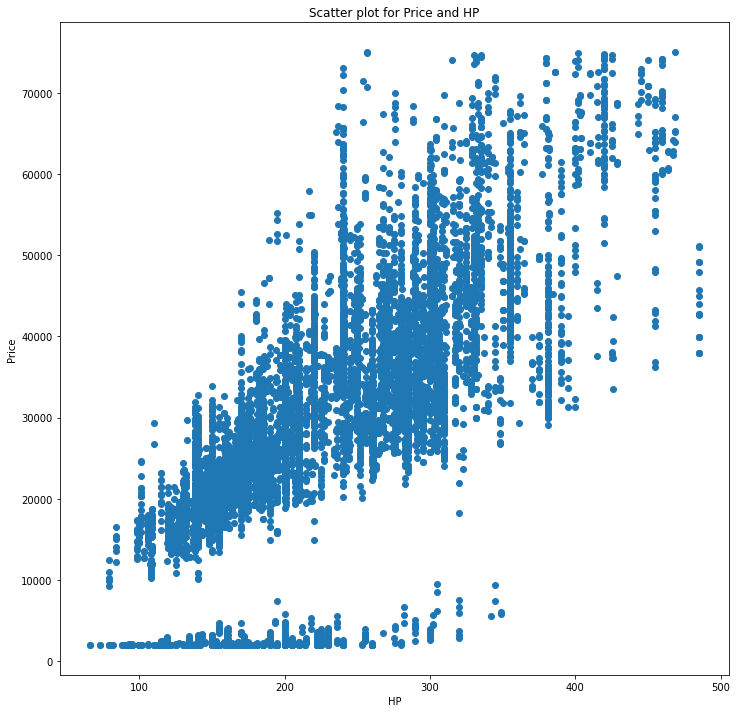

In [61]:
# Graph for HP & Price
fig, axis=plt.subplots(figsize=(12,12))
axis.scatter(df['HP'], df['Price'])
plt.title('Scatter plot for Price and HP')
axis.set_xlabel('HP')
axis.set_ylabel('Price')
plt.show()

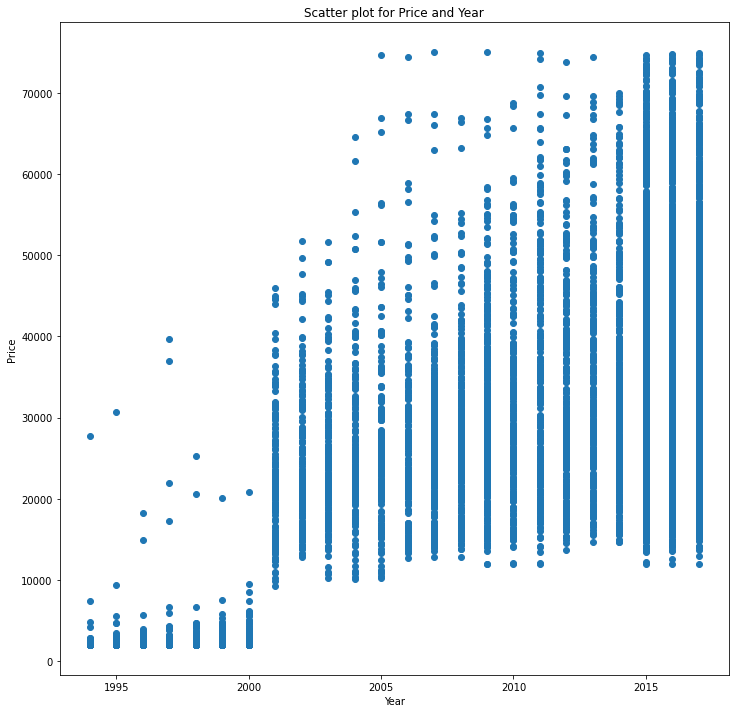

In [36]:
# Graph for Year & Price
fig, axis=plt.subplots(figsize=(12,12))
axis.scatter(df['Year'], df['Price'])
plt.title('Scatter plot for Price and Year')
axis.set_xlabel('Year')
axis.set_ylabel('Price')
plt.show()

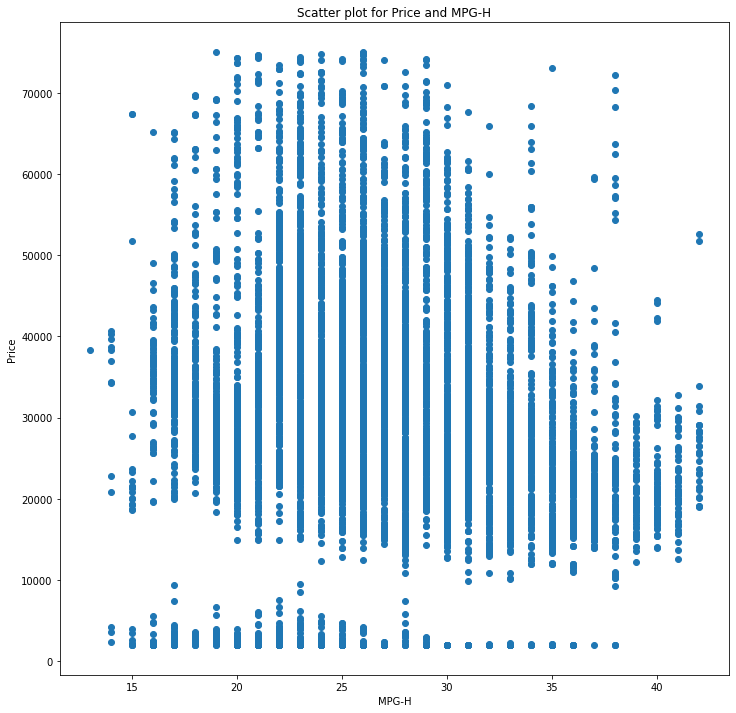

In [62]:
# Graph for MPG-H & Price
fig, axis=plt.subplots(figsize=(12,12))
axis.scatter(df['MPG-H'], df['Price'])
plt.title('Scatter plot for Price and MPG-H')
axis.set_xlabel('MPG-H')
axis.set_ylabel('Price')
plt.show()

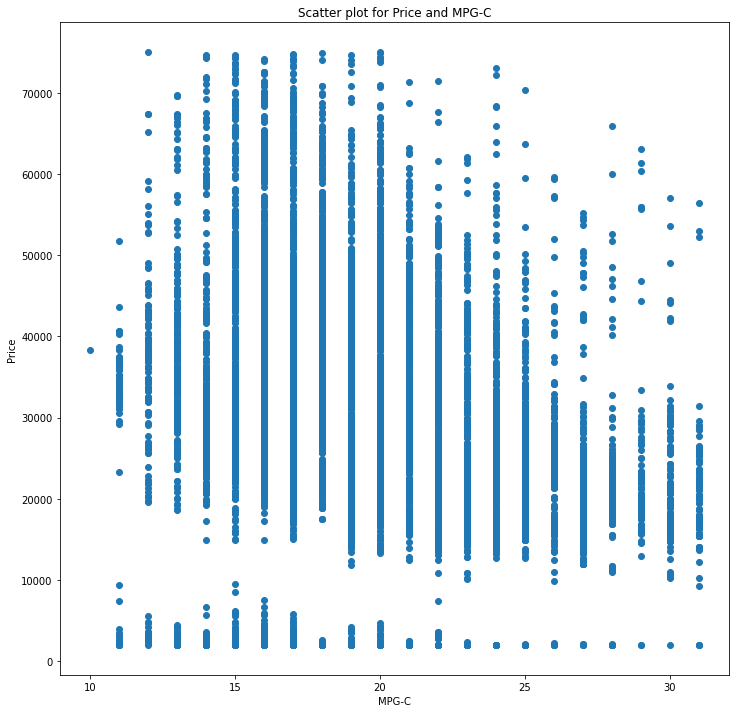

In [63]:
# Graph for MPG-C & Price
fig, axis=plt.subplots(figsize=(12,12))
axis.scatter(df['MPG-C'], df['Price'])
plt.title('Scatter plot for Price and MPG-C')
axis.set_xlabel('MPG-C')
axis.set_ylabel('Price')
plt.show()

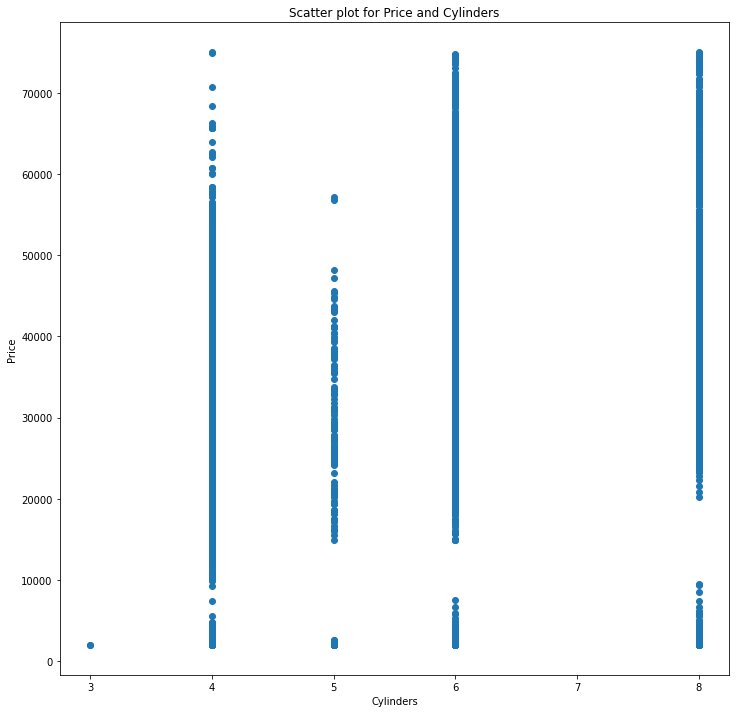

In [64]:
# graph for Cylinders & Price
fig, axis=plt.subplots(figsize=(12,12))
axis.scatter(df['Cylinders'], df['Price'])
plt.title('Scatter plot for Price and Cylinders')
axis.set_xlabel('Cylinders')
axis.set_ylabel('Price')
plt.show()

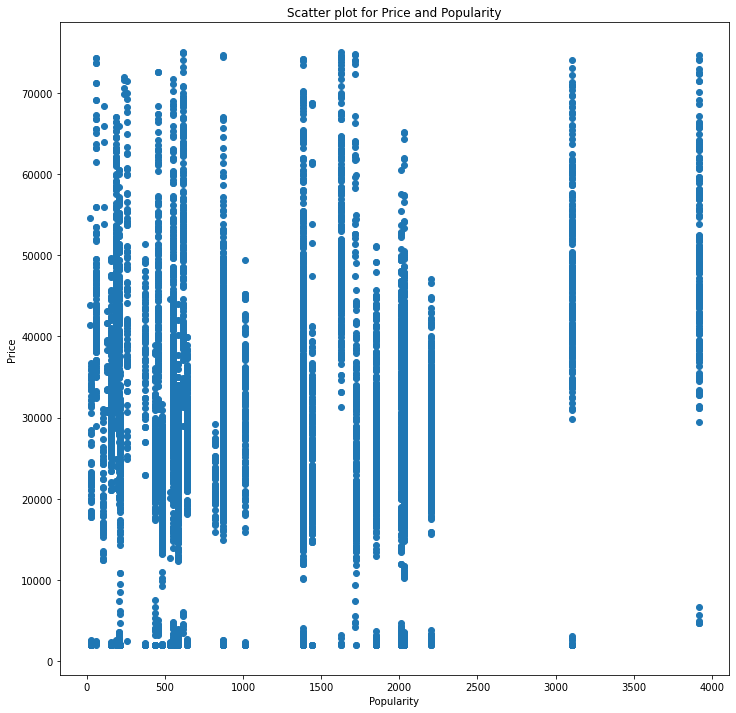

In [65]:
# Graph for Popularity & Price
fig, axis=plt.subplots(figsize=(12,12))
axis.scatter(df["Popularity"], df["Price"])
plt.title("Scatter plot for Price and Popularity")
axis.set_xlabel("Popularity")
axis.set_ylabel("Price")
plt.show()

We can conclude that


*   Value of Price increases as the value of HP increases.
*   Value of price will decrease with the value of MPG-C & MPG-G.
*   As the year increases, price also increases.

Instead of using scatter plot, we can use box plot.

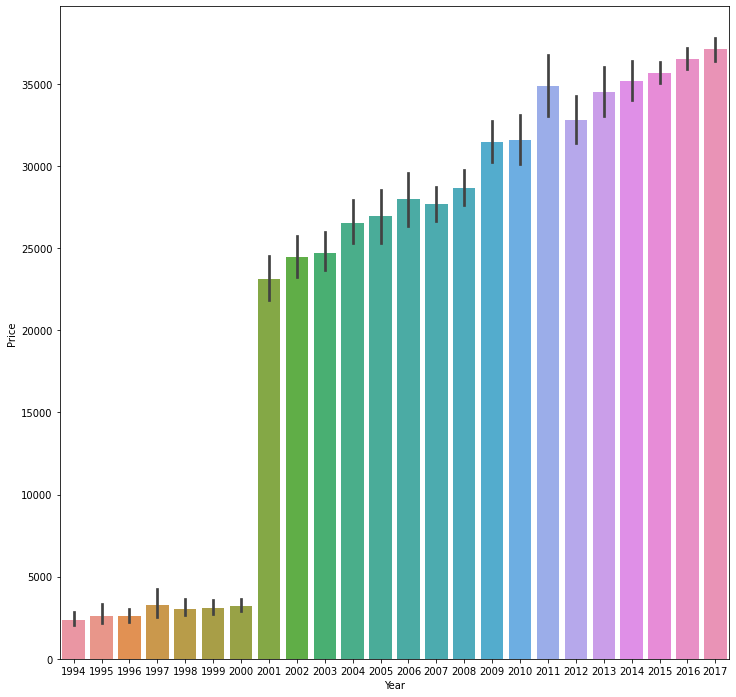

In [45]:
plt.figure(figsize=(12,12))
sns.barplot(df['Year'],df['Price'])

## **Base ML model**

In [46]:
X = df[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
y = df['Price'].values

In [47]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
ss_y = StandardScaler()
X = ss_X.fit_transform(X)
y = ss_y.fit_transform(y.reshape(-1,1))

In [48]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [49]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

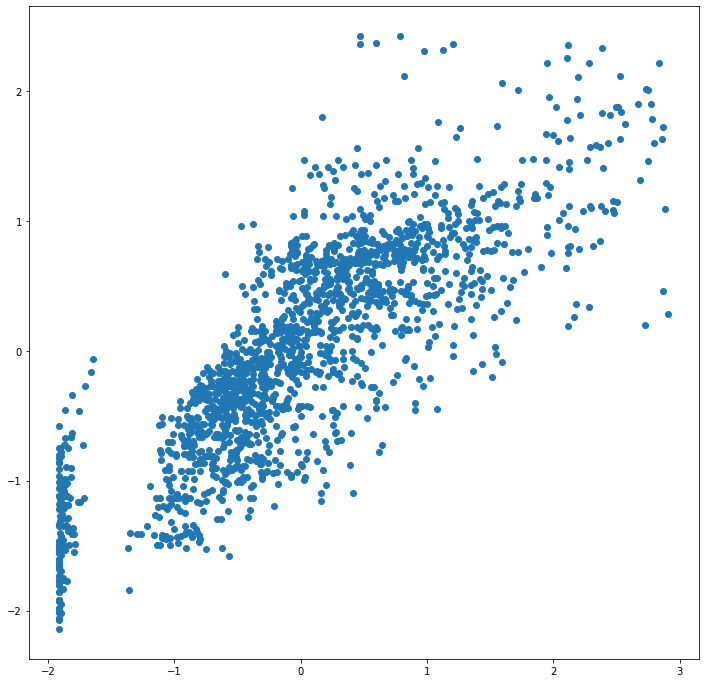

In [50]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
plt.figure(figsize=(12,12))
plt.scatter(y_test,y_pred)

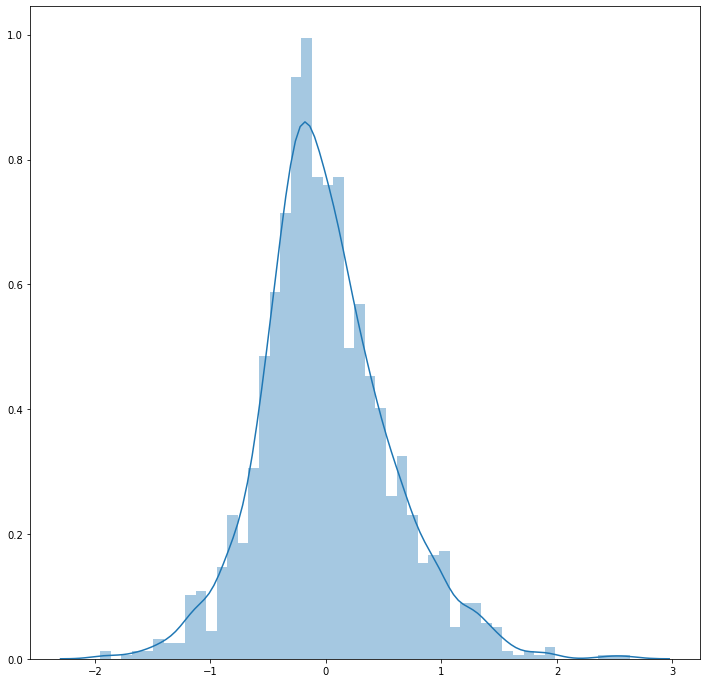

In [51]:
plt.figure(figsize=(12,12))
sns.distplot((y_test-y_pred),bins=50)

In [52]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.4256788993790108
Root Mean Squared Error: 0.5578433473146853
R2 Score: 0.6800475541161142


In [53]:
# Fit Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

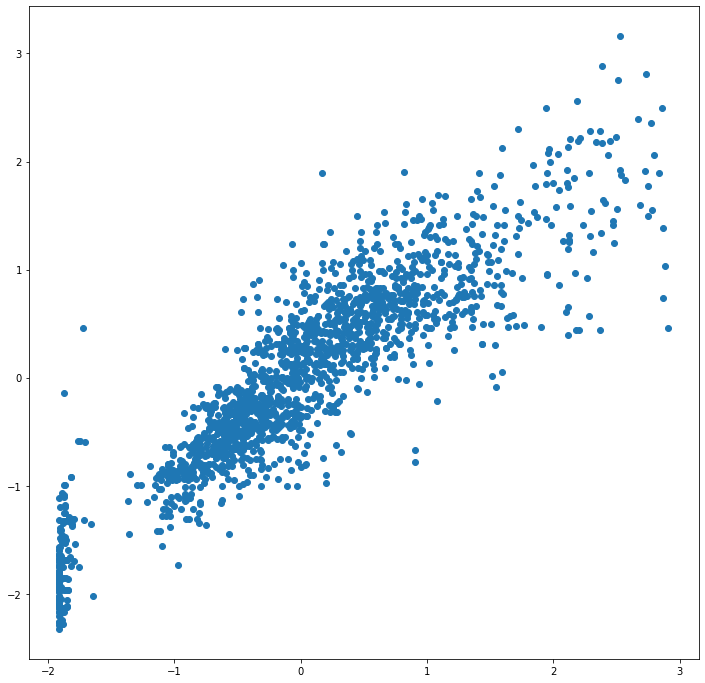

In [55]:
# Predicting a new result with Polynomial Regression
y_pred=lin_reg_2.predict(poly.fit_transform(X_test))
plt.figure(figsize=(12,12))
plt.scatter(y_test,y_pred)

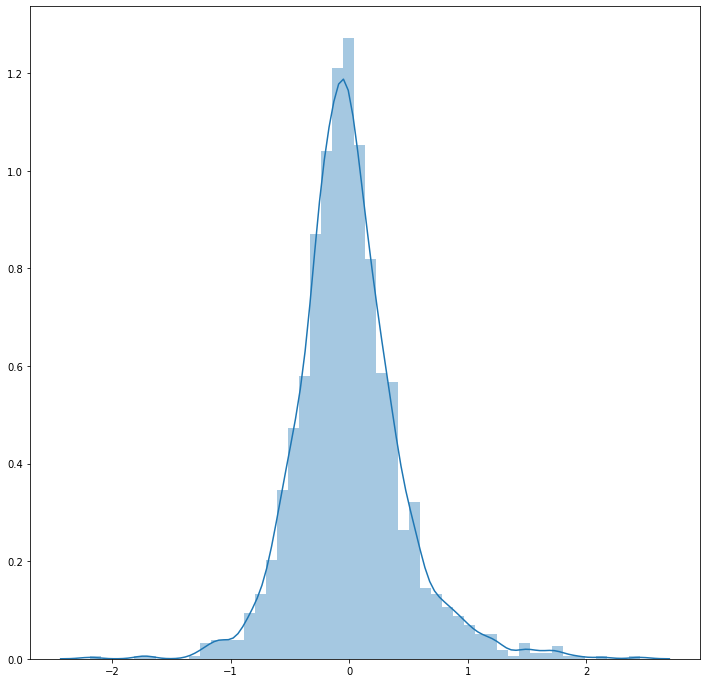

In [56]:
plt.figure(figsize=(12,12))
sns.distplot((y_test-y_pred),bins=50)

In [57]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.31573061752350967
Root Mean Squared Error: 0.4351456478672659
R2 Score: 0.8053160242314694


In [58]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

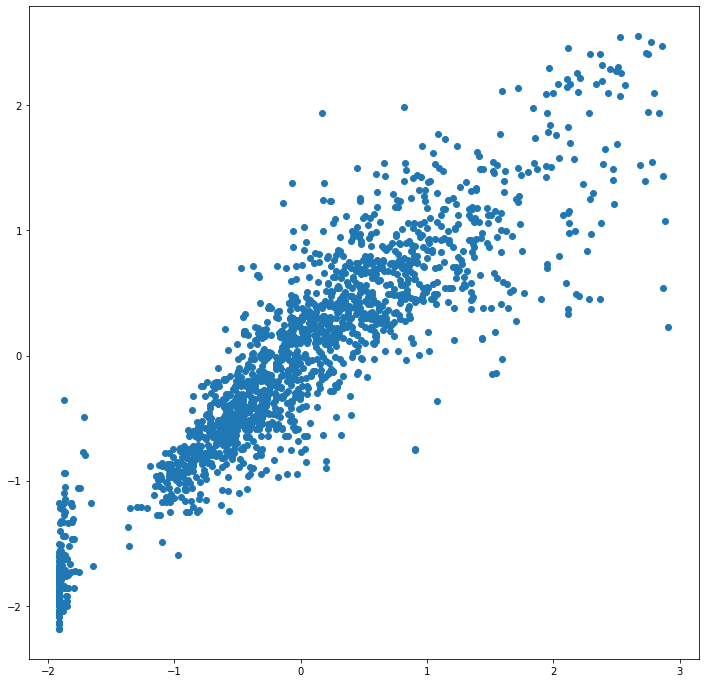

In [59]:
# Predicting result
y_pred = regressor.predict(X_test)
plt.figure(figsize=(12,12))
plt.scatter(y_test,y_pred)

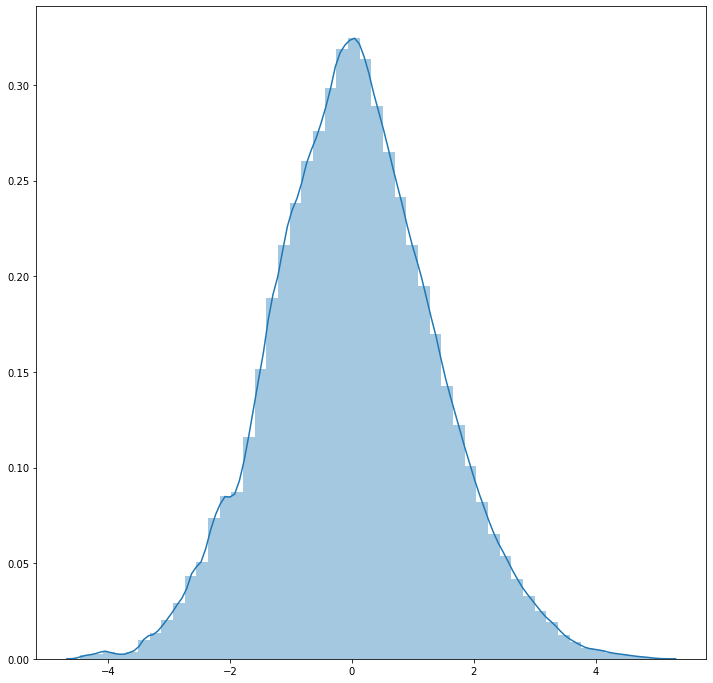

In [60]:
plt.figure(figsize=(12,12))
sns.distplot((y_test-y_pred),bins=50)

In [66]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.29633619416546725
Root Mean Squared Error: 0.42527355451237575
R2 Score: 0.814049362176249


In [67]:
# Fitting Random Forest Regression 
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

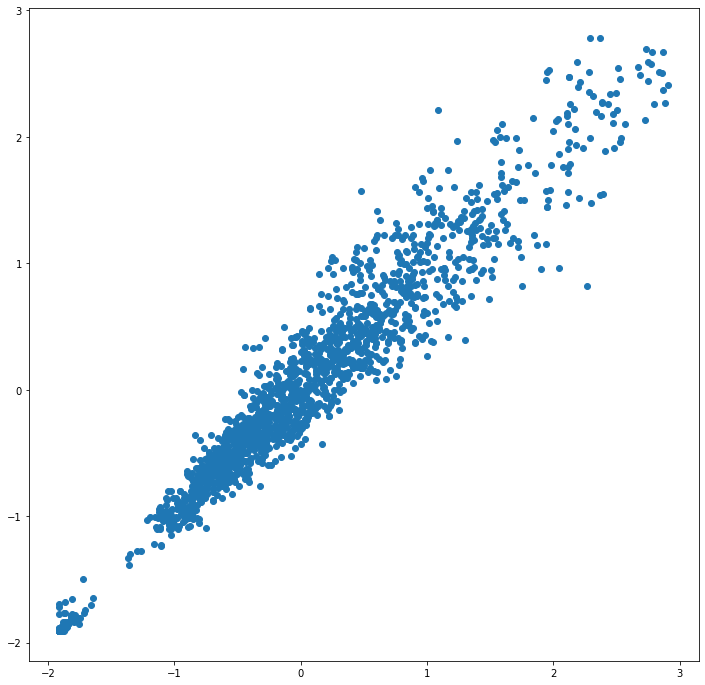

In [68]:
# Predict result
y_pred = regressor.predict(X_test)
plt.figure(figsize=(12,12))
plt.scatter(y_test,y_pred)

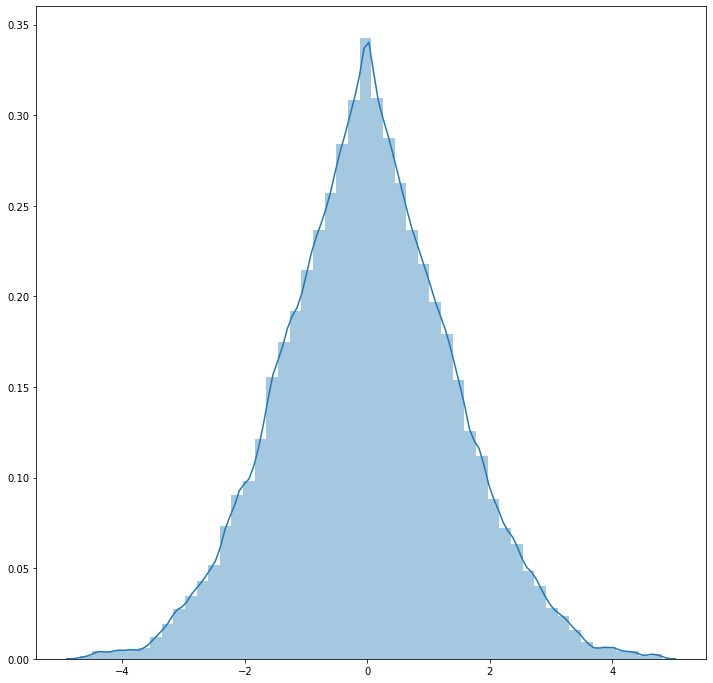

In [69]:
plt.figure(figsize=(12,12))
sns.distplot((y_test-y_pred),bins=50)

In [70]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.17769704010247667
Root Mean Squared Error: 0.24743996001244517
R2 Score: 0.9370492959370332


**Conclusion:**
We have used 3 aglorithms - Polynomial Regression, SVR, Random Forest Regression. R2 Score for Random Forest is high ie. 93.70% whereas R2 score for Polynomial Regression is 80.53%. Hence, Random Forest Regression have higher accuracy than that of the two algorithms.